In [1]:
#dl.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#24 January 2018

In [2]:
#import matplotlib pandas etc
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
pd.set_option('display.max_columns', None)
pd.set_option('display.height', None)
pd.set_option('display.width', None)

height has been deprecated.



In [3]:
#read books dataframe
import pickle
with open('chunks.pkl', 'rb') as fp:
    chunks = pickle.load(fp)
print 'number of records = ', len(chunks)
chunks.head()

number of records =  249870


,author,title,input_file,text_chunk
5732,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"tribunal. The London juries, he said, entertai..."
5733,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"devils as there were tiles on the houses, or l..."
5734,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"indeed be, if we were to suppose that the nati..."
5735,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"reign of Elizabeth, the people were in a state..."
5736,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"Queen of Scotland, the hostility of Philip, ex..."


In [4]:
#apply some manual fixes to the some improperly parsed authors and titles
idx = chunks['author'].str.contains('Proudhon')
chunks.loc[idx, 'author'] = 'Proudhon'
idx = chunks['author'].str.contains('Homer')
chunks.loc[idx, 'author'] = 'Homer'
idx = chunks['author'].str.contains('Wake, Entire')
chunks.loc[idx, 'author'] = 'Archbishop Wake'
chunks.loc[idx, 'title'] = 'Forbidden Gospels and Epistles, Complete'
idx = chunks['title'].str.contains('War And Peace')
chunks.loc[idx, 'author'] = 'Leo Tolstoy'
idx = chunks['title'].str.contains('Nicholas Nickle')
chunks.loc[idx, 'title'] = 'Nicholas Nickleby'
chunks.loc[idx, 'author'] = 'Dickens'
idx = chunks['author'].str.contains('Dick,')
chunks.loc[idx, 'title'] = 'Moby Dick'
chunks.loc[idx, 'author'] = 'Herman Melville'
idx = (chunks['author'] == 'Sshe')
chunks.loc[idx, 'author'] = 'Percy Bysshe Shelley'
chunks.loc[idx, 'title'] = 'The Complete Poetical Works of Percy Bysshe'
idx = chunks['author'].str.contains('Maupassant')
chunks.loc[idx, 'author'] = 'Maupassant'
idx = chunks['author'].str.contains('Dumas')
chunks.loc[idx, 'author'] = 'Dumas'
idx = chunks['author'].str.contains('Constant')
chunks.loc[idx, 'author'] = 'Constant'
idx = chunks['title'].str.contains('Supplemental Nights')
chunks.loc[idx, 'author'] = 'Sir Richard Francis Burton'
idx = chunks['title'].str.contains("Plutarch'S Lives")
chunks.loc[idx, 'title'] = "Plutarch's Lives"
idx = chunks['author'].str.contains("Xenophon")
chunks.loc[idx, 'author'] = "Xenophon"

In [5]:
#count number of chunks each book has, and cumulative sum
count = pd.DataFrame(chunks.groupby('input_file')['title'].count().sort_values())
count.columns = ['chunk_count']
count['cumulative_sum'] = count['chunk_count'].cumsum()
count['cumulative_sum'] /= count['cumulative_sum'].max()
count = count.reset_index(level=0)
count.head()

,input_file,chunk_count,cumulative_sum
0,iso/etext98/2ws2710.txt,17,0.000068
1,iso/etext98/2ws4510.txt,25,0.000168
2,iso/etext98/2ws4410.txt,32,0.000296
3,iso/etext03/fgths10.txt,34,0.000432
4,iso/etext97/mdprp10.txt,37,0.000580


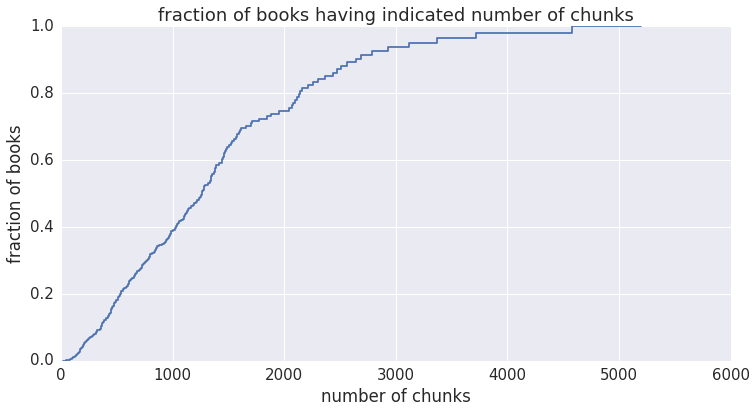

In [6]:
#plot cumulative sum of chunk counts...selecting books having 750 to 2200 chunks would capture
#the majority of books without causing serious class imbalance among the shorter books
fig, ax = plt.subplots(figsize=(12, 6))
xp = count['chunk_count']
yp = count['cumulative_sum']
p = ax.plot(xp, yp, drawstyle='steps-mid')
p = ax.set_xlabel('number of chunks')
p = ax.set_ylabel('fraction of books')
p = ax.set_title('fraction of books having indicated number of chunks')
plt.savefig('figs/chunks.png')

In [7]:
#preserve records associated with books having 750+ chunks
chunks_counted = chunks.merge(count, on='input_file', how='inner')
idx = chunks_counted['chunk_count'] > 750
chunks_counted = chunks_counted[idx]
print 'number of records = ', len(chunks_counted)
chunks_counted.head()

number of records =  176706


,author,title,input_file,text_chunk,chunk_count,cumulative_sum
0,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"tribunal. The London juries, he said, entertai...",2075,0.762961
1,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"devils as there were tiles on the houses, or l...",2075,0.762961
2,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"indeed be, if we were to suppose that the nati...",2075,0.762961
3,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"reign of Elizabeth, the people were in a state...",2075,0.762961
4,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"Queen of Scotland, the hostility of Philip, ex...",2075,0.762961


In [8]:
#loop over each input_file and preserve random sample of each book's chunks, up to 2200 max
chunks_sampled = pd.DataFrame()
input_files = chunks_counted['input_file'].unique()
for input_file in input_files: 
    idx = (chunks_counted['input_file'] == input_file)
    df = chunks_counted[idx]
    Ns = len(df)
    if (Ns > 2200):
        df = df.sample(2200)
    chunks_sampled = chunks_sampled.append(df, ignore_index=True)
print 'number of records = ', len(chunks_sampled)
chunks_sampled.head()

number of records =  165450


,author,title,input_file,text_chunk,chunk_count,cumulative_sum
0,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"tribunal. The London juries, he said, entertai...",2075,0.762961
1,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"devils as there were tiles on the houses, or l...",2075,0.762961
2,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"indeed be, if we were to suppose that the nati...",2075,0.762961
3,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"reign of Elizabeth, the people were in a state...",2075,0.762961
4,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"Queen of Scotland, the hostility of Philip, ex...",2075,0.762961


In [9]:
#confirm that book contribute 750 to 2200 chunks
N_chunks = pd.DataFrame(chunks_sampled.groupby('input_file')['input_file'].count())
N_chunks.columns = ['chunk_count']
N_chunks = N_chunks.reset_index(level=0)
cols = [u'author', u'title', u'input_file', u'text_chunk']
chunks_recounted = chunks_sampled[cols].merge(N_chunks, on='input_file', how='inner')
cols = [u'author', u'title', u'input_file', 'chunk_count', u'text_chunk']
print chunks_recounted['chunk_count'].min(), chunks_recounted['chunk_count'].max()
print 'number of records = ', len(chunks_recounted)
chunks_recounted.head()

757 2200
number of records =  165450


,author,title,input_file,text_chunk,chunk_count
0,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"tribunal. The London juries, he said, entertai...",2075
1,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"devils as there were tiles on the houses, or l...",2075
2,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"indeed be, if we were to suppose that the nati...",2075
3,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"reign of Elizabeth, the people were in a state...",2075
4,Macaulay,Critical & Historical Essays,iso/etext00/1cahe10.txt,"Queen of Scotland, the hostility of Philip, ex...",2075


In [10]:
#for multi-book authors, drop all but the title having the most chunks, and add author_id
N = pd.DataFrame(chunks_recounted.groupby(['author', 'title', 'input_file'])['text_chunk'].count()).reset_index()
N = N.sort_values(['author', 'text_chunk'], ascending=False).drop_duplicates(['author'])
N = N.sort_values('author')
N = N.reset_index(drop=True)
N['author_id'] = N.index
print 'number of books = ', len(N)
N.head()

number of books =  90


,author,title,input_file,text_chunk,author_id
0,A.H. Clough,Plutarch's Lives,iso/etext96/plivs10.txt,2200,0
1,Adam Smith,Wealth Of Nations,iso/etext02/wltnt10.txt,2200,1
2,Adams,The Education Of Henry Adams,iso/etext00/eduha10.txt,1260,2
3,Anne C. Lynch Botta,Handbook Of Universal Literature,iso/etext05/8unlt10.txt,1699,3
4,Anthony Trollope,The Last Chronicle Of Barset,iso/etext02/lacob11.txt,2200,4


In [11]:
#join chunks_recounted to N to preserve the desired books, and randomize records
cols = ['author', 'author_id', 'title', 'input_file', 'text_chunk']
chunks_filtered = chunks_recounted.merge(N[['input_file', 'author_id']], on='input_file', how='inner')[cols]
chunks_filtered = chunks_filtered.sample(frac=1)[cols]
print 'number of records = ', len(chunks_filtered)
chunks_filtered.head()

number of records =  128314


,author,author_id,title,input_file,text_chunk
65273,Thomas D'Arcy Mcgee,81,A Popular History Of Ireland,iso/etext04/phrlc10.txt,"impeachment of Lord Chancellor Bolton, will, i..."
10387,Samuel Butler,72,The Way Of All Flesh,iso/etext00/wflsh10.txt,only remained to secure his earthly happiness?...
78175,Anne C. Lynch Botta,3,Handbook Of Universal Literature,iso/etext05/8unlt10.txt,"power and wealth at Athens, may be best seen i..."
114401,Dumas,25,The Count Of Monte Cristo,iso/etext98/crsto12.txt,"I parted from him two years ago at Palermo, an..."
17735,"John Mcelroy, Entire",48,Andersonville,iso/etext02/andvl11.txt,"outside the prison on parole, as, like the gre..."


In [12]:
#check the above
N = pd.DataFrame(chunks_filtered.groupby(['author', 'title', 'input_file'])['text_chunk'].count())\
    .reset_index().sort_values('author')
print 'number of books = ', len(N)
N.head()

number of books =  90


,author,title,input_file,text_chunk
0,A.H. Clough,Plutarch's Lives,iso/etext96/plivs10.txt,2200
1,Adam Smith,Wealth Of Nations,iso/etext02/wltnt10.txt,2200
2,Adams,The Education Of Henry Adams,iso/etext00/eduha10.txt,1260
3,Anne C. Lynch Botta,Handbook Of Universal Literature,iso/etext05/8unlt10.txt,1699
4,Anthony Trollope,The Last Chronicle Of Barset,iso/etext02/lacob11.txt,2200


In [13]:
#select 3 books
records = chunks_filtered
id0 = 23
id1 = 25
id2 = 55
idx = (records['author_id'] == id0) | (records['author_id'] == id1) | (records['author_id'] == id2)
records = records[idx].copy()
records['author_id'] = records['author_id'].replace({id0:0, id1:1, id2:2})#, axis=1)
records.head(20)

,author,author_id,title,input_file,text_chunk
114401,Dumas,1,The Count Of Monte Cristo,iso/etext98/crsto12.txt,"I parted from him two years ago at Palermo, an..."
122841,Leo Tolstoy,2,Anna Karenina,iso/etext98/nkrnn11.txt,"unpleasantness of the petitioner's position, b..."
109648,Dickens,0,Nicholas Nickleby,iso/etext97/ncklb10.txt,"he is,' growled Newman, 'and somebody with him..."
115410,Dumas,1,The Count Of Monte Cristo,iso/etext98/crsto12.txt,shall the preliminary arrangements be settled?...
109661,Dickens,0,Nicholas Nickleby,iso/etext97/ncklb10.txt,"the year these bills disappear, and the houses..."
114890,Dumas,1,The Count Of Monte Cristo,iso/etext98/crsto12.txt,"simple-looking lawyer's clerk, elevated to the..."
115759,Dumas,1,The Count Of Monte Cristo,iso/etext98/crsto12.txt,"dust."" ""Well, such things have been."" ""That th..."
115872,Dumas,1,The Count Of Monte Cristo,iso/etext98/crsto12.txt,mistaken as to the value of a stone.' Caderous...
111077,Dickens,0,Nicholas Nickleby,iso/etext97/ncklb10.txt,"looks could show it. 'Well, Nickleby,' said Sq..."
122735,Leo Tolstoy,2,Anna Karenina,iso/etext98/nkrnn11.txt,as to any unbeliever who respects the beliefs ...


In [14]:
#train-test-validate split
train_size = 0.33
validate_size=0.5   #this is the fraction of the test sample that is assigned to the validation sample
rn_seed = 12
from sklearn.model_selection import train_test_split
train, test = train_test_split(records, train_size=train_size, random_state=rn_seed)
validate, test = train_test_split(test, train_size=validate_size, random_state=rn_seed)
print 'records.shape  = ', records.shape
print 'train.shape    = ', train.shape
print 'test.shape     = ', test.shape
print 'validate.shape = ', validate.shape

records.shape  =  (6600, 5)
train.shape    =  (2178, 5)
test.shape     =  (2211, 5)
validate.shape =  (2211, 5)


In [15]:
#confirm that all 90 books have records in the training sample
print len(train['input_file'].unique()), len(records['input_file'].unique())

3 3


In [16]:
#count word frequencies...there are 500K distinct words used in these books, really???
#i'm not sure about the...maybe this is due to lack of treatment of punctuation characters
from collections import defaultdict
word_frequency = defaultdict(int)
corpus = records['text_chunk'].tolist()
for doc in corpus:
    words = doc.split(' ')
    for word in words:
        word_frequency[word] += 1
print 'number of distinct words = ', len(word_frequency.keys()) 
for word in word_frequency.keys()[1:7]:
    print word, word_frequency[word]

number of distinct words =  51929
considered, 3
considered. 3
Impartial, 2
'Pho! 1
woods 1
Catalans, 3


In [17]:
#generate tokenizer
vocabulary_size = 52014
N_inputs = 100
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocabulary_size)

Using TensorFlow backend.


In [18]:
#this helper function extracts and tokenizes x, and extracts y and onehot-encodes it
from keras.utils import np_utils
def tokenize(df, tokenizer):
    corpus = df['text_chunk'].tolist()
    tokenizer.fit_on_texts(corpus)
    corpus_tokenized = tokenizer.texts_to_sequences(corpus)
    corpus_padded = pad_sequences(corpus_tokenized, maxlen=N_inputs)
    x = np.array(corpus_padded)
    y_ids = df['author_id'].values
    y = np_utils.to_categorical(y_ids)
    return x, y

In [19]:
#get training x,y with x-values being tokenized and y values onehot-encoded
x_train, y_train = tokenize(train, tokenizer)
N_inputs = x_train.shape[1]
N_outputs = y_train.shape[1]
print 'x_train.shape = ', x_train.shape
print 'y_train.shape = ', y_train.shape
print 'N_inputs = ', N_inputs
print 'N_outputs = ', N_outputs
print 'vocabulary_size = ', vocabulary_size, x_train.min(), x_train.max()

x_train.shape =  (2178, 100)
y_train.shape =  (2178, 3)
N_inputs =  100
N_outputs =  3
vocabulary_size =  52014 0 13998


In [20]:
#display a training record
idx = 321
print train.iloc[idx]
text_chunk = train.iloc[idx]['text_chunk']
print text_chunk
print x_train[321]
print y_train[321]

author                                              Leo Tolstoy
author_id                                                     2
title                                             Anna Karenina
input_file                              iso/etext98/nkrnn11.txt
text_chunk    spite of the cross expression with which she s...
Name: 122592, dtype: object
spite of the cross expression with which she stared at the stranger. She positively envied the baby's healthy appearance. She was delighted, too, at the baby's crawling. Not one of her own children had crawled like that. When the baby was put on the carpet and its little dress tucked up behind, it was wonderfully charming. Looking round like some little wild animal at the grown-up big people with her bright black eyes, she smiled, unmistakably pleased at their admiring her, and holding her legs sideways, she pressed vigorously on her arms, and rapidly drew her whole back up after, 
[    4     1  2109   325    15    30    25  2800    20     1   

In [21]:
#show that the vectorized text preserves word order while dropping punctuation
tokens = []
words_marked = text_chunk.split(' ')[0:15]
words = [word.lower().strip(',').strip('.') for word in words_marked]
tokens = [tokenizer.word_index[word] for word in words]
print words
print tokens

['spite', 'of', 'the', 'cross', 'expression', 'with', 'which', 'she', 'stared', 'at', 'the', 'stranger', 'she', 'positively', 'envied']
[533, 4, 1, 2109, 325, 15, 30, 25, 2800, 20, 1, 918, 25, 953, 4634]


In [22]:
#get validation x,y with x-values being tokenized and y values onehot-encoded
x_valid, y_valid = tokenize(validate, tokenizer)
print 'x_valid.shape = ', x_valid.shape
print 'y_valid.shape = ', y_valid.shape

x_valid.shape =  (2211, 100)
y_valid.shape =  (2211, 3)


In [23]:
#display a validation record
idx = 123
print validate.iloc[idx]
print validate.iloc[idx]['text_chunk']
print x_valid[321]
print y_valid[321]

author                                              Leo Tolstoy
author_id                                                     2
title                                             Anna Karenina
input_file                              iso/etext98/nkrnn11.txt
text_chunk    corridor. Here Vronsky showed them the mechani...
Name: 122022, dtype: object
corridor. Here Vronsky showed them the mechanism for ventilation on a novel system. Then he showed them marble baths, and beds with extraordinary springs. Then he showed them the wards one after another, the storeroom, the linen room, then the heating stove of a new pattern, then the trolleys, which would make no noise as they carried everything needed along the corridors, and many other things. Sviazhsky, as a connoisseur in the latest mechanical improvements, appreciated everything fully. Dolly simply wondered at all she had not seen before, and, anxious to understand it all, made minute inquiries about everything, which 
[   95  9030     2  

In [24]:
##architect a simple LSTM model...this one is adapted from 
##https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
#from keras.layers import Embedding, LSTM, Dense, Dropout#, Conv1D, MaxPooling1D, Activation
#from keras.models import Sequential
#from keras.models import Sequential
#from keras.layers import Dense
#def build_simple_lstm_model(N_inputs, N_hidden, N_outputs,):
#    model = Sequential()
#    model.add(Dense(N_hidden, input_dim=N_inputs, activation='relu'))
#    model.add(Dense(N_outputs, activation='softmax'))
#    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model

In [25]:
##build a better LSTM model...this one is adapted from 
##http://www.developintelligence.com/blog/2017/06/practical-neural-networks-keras-classifying-yelp-reviews
#from keras.layers import Embedding, LSTM, Dense, Dropout#, Conv1D, MaxPooling1D, Activation
#from keras.models import Sequential
#def build_lstm_model(N_inputs, N_outputs, vocabulary_size, embedding_vector_length):
#    model = Sequential()
#    model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=N_inputs))
#    model.add(LSTM(embedding_vector_length, dropout=0.2, recurrent_dropout=0.2))
#    model.add(Dense(N_outputs, activation='softmax'))
#    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model

In [183]:
#build an even better LSTM model...this one is adapted from
#http://www.developintelligence.com/blog/2017/06/practical-neural-networks-keras-classifying-yelp-reviews
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from keras.models import Sequential
def build_lstm_model(N_inputs, N_outputs, vocabulary_size, embedding_vector_length, conv1d_kernel_size):
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=N_inputs))
    model.add(Dropout(0.3))
    model.add(Conv1D(2*embedding_vector_length, conv1d_kernel_size, activation='relu'))
    pool_size = 2*conv1d_kernel_size
    model.add(MaxPooling1D(pool_size=pool_size))
    lstm_size = embedding_vector_length/pool_size
    model.add(LSTM(lstm_size, activation='linear'))
    model.add(Dense(N_outputs, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [198]:
#this is a half-assed version of
#https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6
def build_lstm_model(N_inputs, N_outputs):
    model = Sequential()
    model.add(Dense(N_inputs, input_shape=(1,), activation='tanh'))
    model.add(Dense(N_inputs/2, activation='tanh'))
    dense_inputs = int(np.sqrt(N_inputs + N_outputs))
    model.add(Dense(dense_inputs, activation='tanh'))
    model.add(Dense(N_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [201]:
#Dense?

In [202]:
#build the lstm model to the training data
N_training_epochs = 60
batch_size = 3000
embedding_vector_length = 50
conv1d_kernel_size = 4
print 'N_training_epochs = ', N_training_epochs
print 'batch_size = ', batch_size
print 'number of samples = ', x_train.shape[0] + x_valid.shape[0]
print 'vocabulary_size = ', vocabulary_size
print 'embedding_vector_length = ', embedding_vector_length
print 'conv1d_kernel_size = ', conv1d_kernel_size
print 'N_inputs = ', N_inputs, x_train.shape[1]
print 'N_outputs = ', N_outputs, y_train.shape[1]
#lstm_model = build_lstm_model(N_inputs, N_outputs, vocabulary_size, embedding_vector_length, conv1d_kernel_size)
lstm_model = build_lstm_model(N_inputs, N_outputs)

N_training_epochs =  60
batch_size =  3000
number of samples =  4389
vocabulary_size =  52014
embedding_vector_length =  50
conv1d_kernel_size =  4
N_inputs =  100 100
N_outputs =  3 3


In [203]:
#fit model to the training data
fit_history = lstm_model.fit(x_train, y_train, epochs=N_training_epochs, batch_size=batch_size, verbose=0, \
    validation_data=(x_valid, y_valid))

ValueError: Error when checking input: expected dense_55_input to have 3 dimensions, but got array with shape (2178, 100)

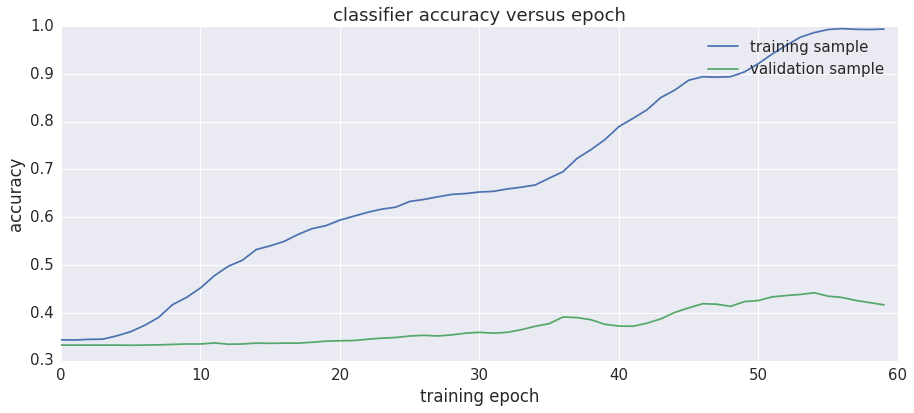

In [181]:
#plot accuracy vs training epoch
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = fit_history.epoch
yp = fit_history.history['acc']
ax.plot(xp, yp, label='training sample')
yp = fit_history.history['val_acc']
ax.plot(xp, yp, label='validation sample')
ax.set_title('classifier accuracy versus epoch')
ax.set_ylabel('accuracy')
ax.set_xlabel('training epoch')
ax.legend()
plt.savefig('figs/accuracy.png')

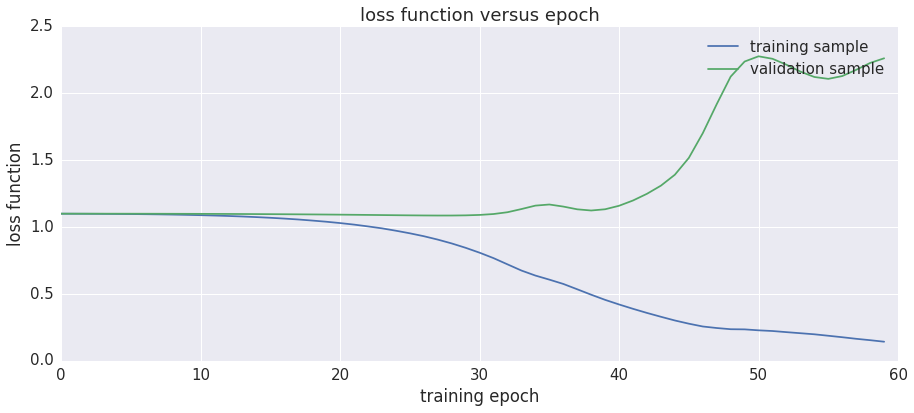

In [182]:
#plot loss function vs training epoch
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = fit_history.epoch
yp = fit_history.history['loss']
ax.plot(xp, yp, label='training sample')
yp = fit_history.history['val_loss']
ax.plot(xp, yp, label='validation sample')
ax.set_title('loss function versus epoch')
ax.set_ylabel('loss function')
ax.set_xlabel('training epoch')
ax.legend()
plt.savefig('figs/loss.png')

In [130]:
#model.predict(x_test)